In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.io import wavfile
from scipy.signal import spectrogram

In [ ]:
f1=100
f2=200
f3=150

fmax = f2

fs = 20*fmax
ts=1/fs
t = np.arange(0,10,1/fs)

x1 = np.sin(2*np.pi*f1*t)
x2 = np.sin(2*np.pi*f2*t)
x3 = np.sin(2*np.pi*f3*t)

xt = x1+x2+x3

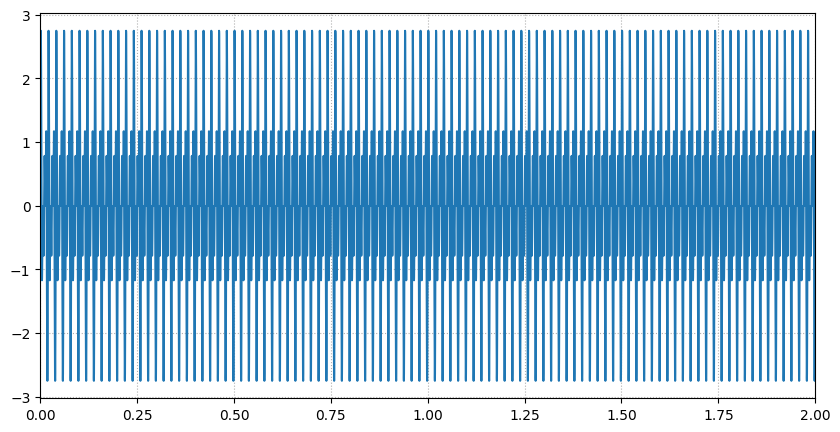

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t,xt)
plt.grid(ls=":")
plt.xlim(0,2)
plt.show()

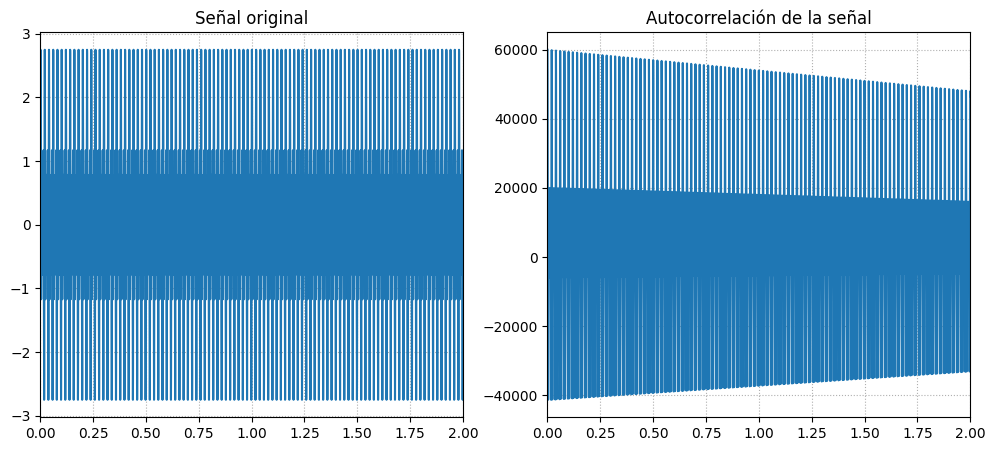

In [ ]:
from scipy.signal import correlate

# Calcular la autocorrelación
autocorr = correlate(xt, xt, mode='full')

# Como `mode='full'`, el resultado tiene 2N-1 elementos
# Para centrarnos en la parte positiva de la autocorrelación
autocorr = autocorr[autocorr.size // 2:]

# Graficar la señal y su autocorrelación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t,xt)
plt.xlim(0,2)
plt.grid(ls=":")
plt.title("Señal original")

plt.subplot(1, 2, 2)
plt.plot(t,autocorr)
plt.grid(ls=":")
plt.xlim(0,2)
plt.title("Autocorrelación de la señal")

plt.show()

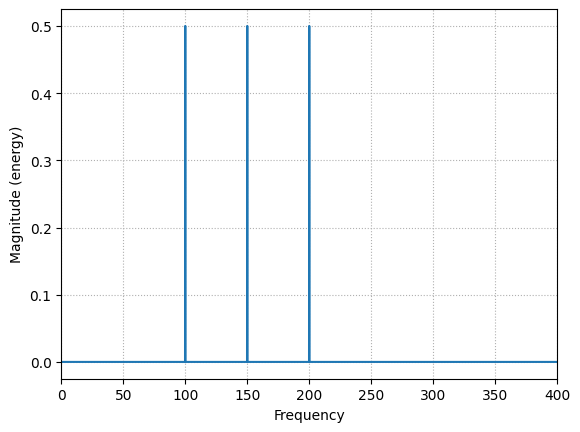

In [ ]:
plt.magnitude_spectrum(xt,Fs=fs)
plt.xlim(0,2*fmax)
plt.grid(ls=":")
plt.show()

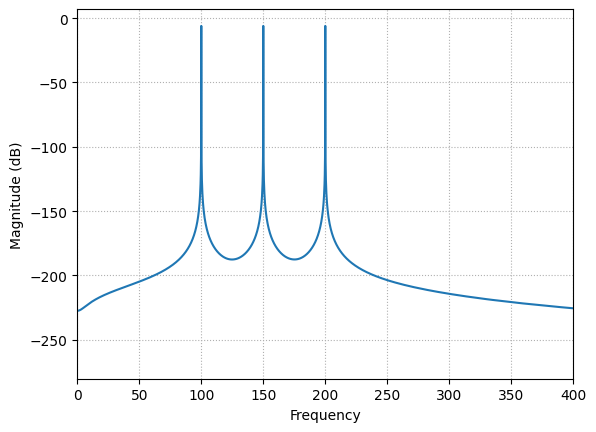

In [ ]:
plt.magnitude_spectrum(xt,Fs=fs, scale='dB')
plt.xlim(0,2*fmax)
plt.grid(ls=":")
plt.show()

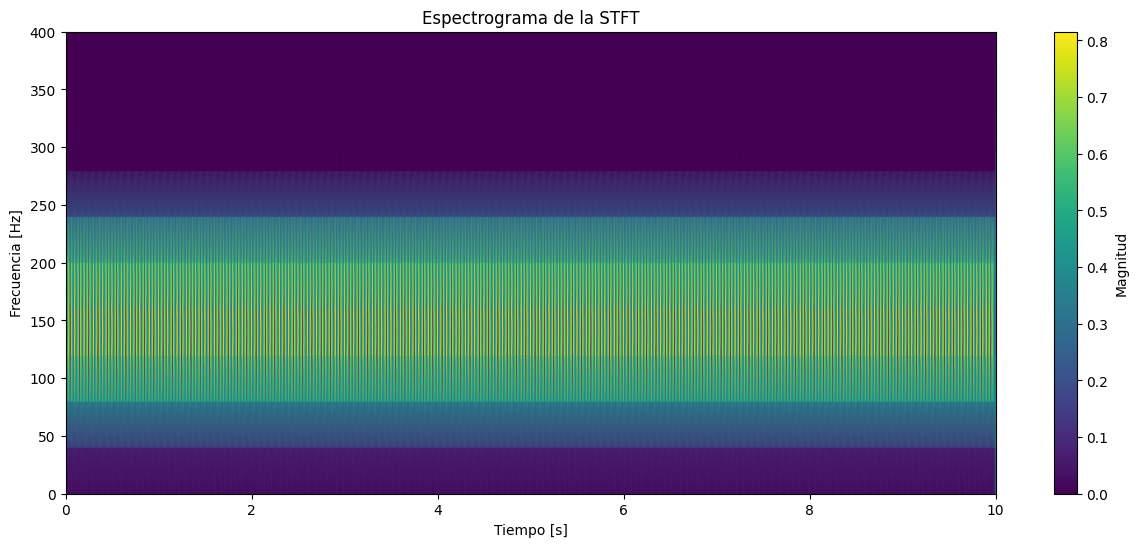

In [ ]:
# Calcular la STFT
from scipy import signal

f, t, Zxx = signal.stft(xt, fs, nperseg=100)

# Graficar el espectrograma
plt.figure(figsize=(15, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('Espectrograma de la STFT')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.ylim(0,2*fmax)
plt.colorbar(label='Magnitud')
plt.show()

In [ ]:
wavfile.write("signal2.wav",fs,xt)


In [ ]:
from scipy.io import savemat

sdic = {
    "t":t,
    "x1":x1,
    "x2":x2,
    "x3":x3,
    "xt":xt,
    "fs": fs,
    "label": "señales de 3 frecuencias: 10hz, 15hz y 20hz"
}

savemat("signal1.mat",sdic)

## sistemas

In [ ]:
def zplane(b, a):
    """Grafica el diagrama de polos y ceros"""
    plt.figure(figsize=(6, 6))

    # Normalización de los coeficientes si a[0] no es 1
    b = b / a[0]
    a = a / a[0]

    # Polos y ceros
    zeros = np.roots(b)
    poles = np.roots(a)

    # Crear el círculo unitario
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='dotted')
    plt.gca().add_artist(unit_circle)

    # Graficar los ceros y polos
    plt.plot(np.real(zeros), np.imag(zeros), 'go', label='Ceros')
    plt.plot(np.real(poles), np.imag(poles), 'rx', label='Polos')

    plt.axvline(0, color='k', linestyle='dotted')
    plt.axhline(0, color='k', linestyle='dotted')

    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.title('Diagrama de Polos y Ceros')
    plt.legend()

    plt.grid(True)
    plt.axis('equal')
    plt.show()

In [ ]:
from scipy import signal


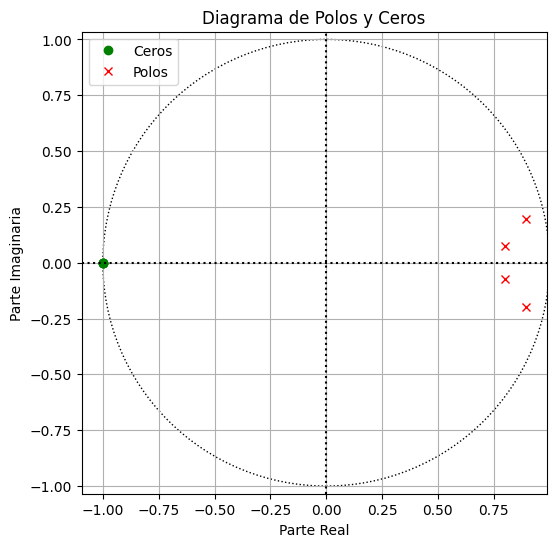

In [ ]:
# Parámetros del filtro
fs = fs  # Frecuencia de muestreo
cutoff = 15  # Frecuencia de corte
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist

b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
# Graficar el diagrama de polos y ceros
zplane(b, a)

In [ ]:
# Obtener la función de transferencia
sys = signal.TransferFunction(b, a, dt=1/fs)
print(sys)

TransferFunctionDiscrete(
array([0.00014412, 0.00057648, 0.00086472, 0.00057648, 0.00014412]),
array([ 1.        , -3.38497273,  4.33706182, -2.48913829,  0.53935513]),
dt: 0.0025
)


In [ ]:
sys

TransferFunctionDiscrete(
array([0.00014412, 0.00057648, 0.00086472, 0.00057648, 0.00014412]),
array([ 1.        , -3.38497273,  4.33706182, -2.48913829,  0.53935513]),
dt: 0.0025
)

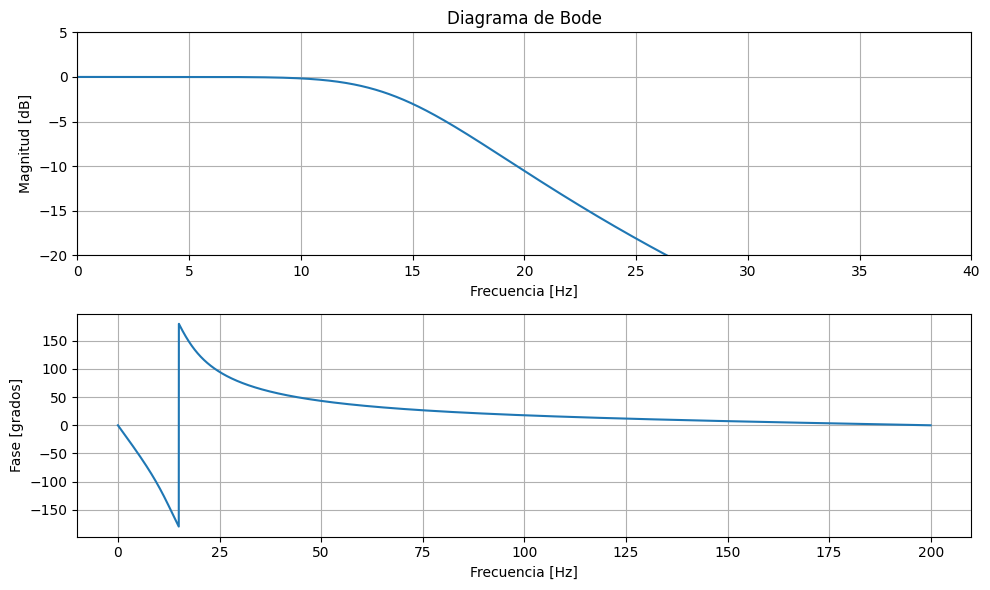

In [ ]:
# Obtener la función de transferencia
w, h = signal.freqz(b, a, worN=8000)

# Graficar diagrama de Bode
plt.figure(figsize=(10, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)))
plt.xlim(0,2*fmax)
plt.ylim(-20,5)
plt.title('Diagrama de Bode')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(0.5 * fs * w / np.pi, np.angle(h) * 180 / np.pi)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.grid()

plt.tight_layout()
plt.show()

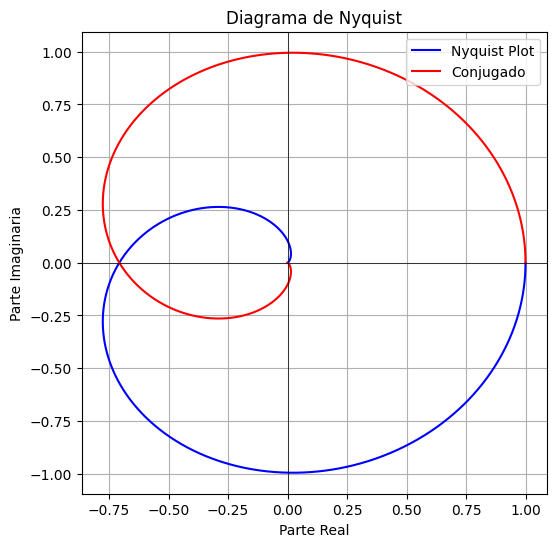

In [ ]:
# Graficar diagrama de Nyquist
plt.figure(figsize=(6, 6))
plt.plot(h.real, h.imag, 'b', label='Nyquist Plot')
plt.plot(h.real, -h.imag, 'r', label='Conjugado')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Diagrama de Nyquist')
plt.grid(True)
plt.legend()
plt.show()

## Funcion de transferencia

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [ ]:
import pygraphviz as pgv
from IPython.display import Image

def create_transfer_function_diagram(num, den):
    """Crea un diagrama de bloques de la función de transferencia"""
    G = pgv.AGraph(strict=False, directed=True)

    # Añadir nodos
    G.add_node('Input', shape='plaintext')
    G.add_node('Summing Point', shape='circle', label='')
    G.add_node('Transfer Function', shape='box', label='H(s)')
    G.add_node('Output', shape='plaintext')

    # Añadir aristas
    G.add_edge('Input', 'Summing Point')
    G.add_edge('Summing Point', 'Transfer Function')
    G.add_edge('Transfer Function', 'Output')

    # Crear el diagrama y guardarlo como PNG
    G.layout(prog='dot')
    path_graph = "./sys.png"
    G.draw(path_graph)

    return Image(path_graph)

In [ ]:
# Obtener la función de transferencia
sys = signal.TransferFunction(b, a, dt=1/fs)
print(sys)

TransferFunctionDiscrete(
array([0.00014412, 0.00057648, 0.00086472, 0.00057648, 0.00014412]),
array([ 1.        , -3.38497273,  4.33706182, -2.48913829,  0.53935513]),
dt: 0.0025
)


In [ ]:
sys.num, sys.den

(array([0.00014412, 0.00057648, 0.00086472, 0.00057648, 0.00014412]),
 array([ 1.        , -3.38497273,  4.33706182, -2.48913829,  0.53935513]))

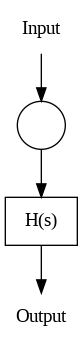

In [ ]:
create_transfer_function_diagram(sys.num, sys.den)

In [ ]:
import sympy as sp

z = sp.symbols('z')

# Crear el polinomio del numerador y denominador
numerator = sum([coeff * z**i for i, coeff in enumerate(reversed(sys.num))])
denominator = sum([coeff * z**i for i, coeff in enumerate(reversed(sys.den))])

# Definir la función de transferencia simbólica
H_s = numerator / denominator

# Simplificar la expresión simbólica
H_s_simplified = sp.simplify(H_s)

# Mostrar la función de transferencia de manera estética
sp.pretty_print(H_s_simplified)

                      4                         3                       2                          ↪
0.000144120224075383⋅z  + 0.000576480896301533⋅z  + 0.0008647213444523⋅z  + 0.000576480896301533⋅z ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                    4                    3                     2                                   ↪
               1.0⋅z  - 3.3849727283039⋅z  + 4.33706181742134⋅z  - 2.48913829381255⋅z + 0.53935512 ↪

↪                        
↪  + 0.000144120224075383
↪ ───────────────────────
↪                        
↪ 8280308                
